### Title: Analysis of The House Market in Florida

#### Name: Nicolas Bolanos

#### Date: November 2023

- The project's main objective is to understand the housing market in the state of Florida by analyzing datasets from the State and the city of Miami to understand house prices and affordability for the average median income family. 

In [90]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

- Data exploration for All transactions House Price Index for Florida dataset
- Units: Index from 1975:Q1=100 / Quaterly adjusted

In [91]:
# Import florida_housing dataset
florida_df = pd.read_csv("florida_housing.csv")

In [92]:
# Displaying first 10 rows of dataset
florida_df.head(40)

,DATE,FLSTHPI
0,1975-01-01,65.93
1,1975-04-01,83.46
2,1975-07-01,66.80
3,1975-10-01,68.20
4,1976-01-01,67.97
5,1976-04-01,76.03
6,1976-07-01,69.04
7,1976-10-01,70.26
8,1977-01-01,70.98
9,1977-04-01,78.97


In [93]:
# Getting basic information on dataset
florida_df.shape

(194, 2)

In [94]:
florida_df.describe

<bound method NDFrame.describe of            DATE  FLSTHPI
0    1975-01-01    65.93
1    1975-04-01    83.46
2    1975-07-01    66.80
3    1975-10-01    68.20
4    1976-01-01    67.97
..          ...      ...
189  2022-04-01   734.87
190  2022-07-01   766.55
191  2022-10-01   765.85
192  2023-01-01   767.26
193  2023-04-01   785.74

[194 rows x 2 columns]>

In [95]:
florida_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     194 non-null    object 
 1   FLSTHPI  194 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [96]:
florida_df.isnull().sum()

DATE       0
FLSTHPI    0
dtype: int64

- Performing graphical analysis to explore information provided from the following columns: DATE and FLSTHPI

- FLSTHPI stands for All Transactions House Price Index for Florida
- Distribution and Histogram plot use the variable FLSTHPI to show the impact of house prices in house   availability since 1980s to present.
- The number of affordable homes is decreases as homes increase in value

C:\Users\Nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


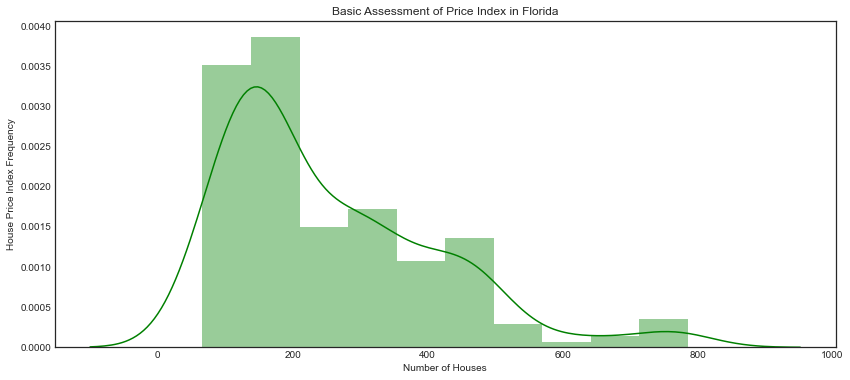

In [97]:
# House Price Index assessment
plt.figure(figsize =(14,6))
sns.distplot(x = florida_df['FLSTHPI'], color = 'green')

plt.title('Basic Assessment of Price Index in Florida')
plt.xlabel('Number of Houses')
plt.ylabel('House Price Index Frequency')

plt.show()

In [98]:
florida_df['DATE'] = pd.to_numeric(florida_df['DATE'], errors='coerce')

In [99]:
florida_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     0 non-null      float64
 1   FLSTHPI  194 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


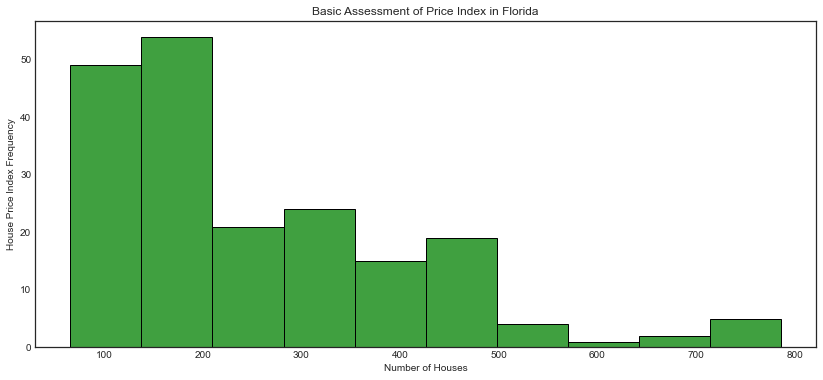

In [100]:
# House Price Index assessment
plt.figure(figsize =(14,6))
sns.histplot(x = florida_df['FLSTHPI'], color = 'green')

plt.title('Basic Assessment of Price Index in Florida')
plt.xlabel('Number of Houses')
plt.ylabel('House Price Index Frequency')

plt.show()

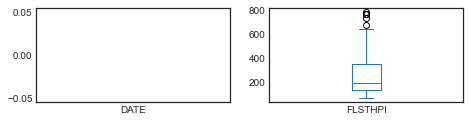

In [101]:
# Visualizing number of variables from dataset 
florida_df.plot(kind = 'box', subplots = True, layout = (4,4), figsize = (16,8))

plt.title('Box-plot of Variables')
plt.show()

C:\Users\Nicol\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Nicol\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


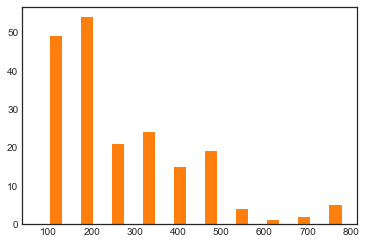

In [102]:
plt.hist(florida_df);

plt.show()

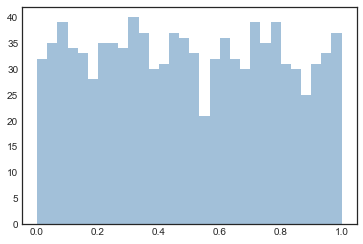

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

florida_df = np.random.random(1000)

plt.hist(florida_df, bins=30, alpha=0.5,
        histtype = 'stepfilled', color='steelblue',
        edgecolor='none')

plt.show()

##### Analyzing Miami house prices

- Analysis of real estate in Miami to compare between other parts of Florida. 
- Miami is one of the most expensive places to live according to the Federal Housing Finance Agency.
    -source:https://www.fhfa.gov/DataTools/Downloads/Pages/Current-Market-Data.aspx

In [104]:
# Import Required Libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import seaborn as sns
import plotly.express as px

In [105]:
from contextlib import contextmanager
from time import time
from tqdm import tqdm
import lightgbm as lgbm
import category_encoders as ce



from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [106]:
# Acquiring data from miami-housing dataset

miami_df = pd.read_csv("miami-housing.csv")

In [107]:
# Displaying first 10 rows of dataset
miami_df.head(40)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
5,25.892060,-80.161354,622280070180,630000.0,9900,1531,2978,2391.4,13017.0,188.9,43135.1,38176.2,15687.2,41,0,2,4
6,25.892473,-80.157217,622280080100,1020000.0,10387,1753,23116,3277.4,11667.8,0.0,43598.7,37973.9,17068.2,63,0,2,5
7,25.893019,-80.157426,622280080400,850000.0,10272,1663,34933,3112.4,11718.1,10.5,43780.8,38198.3,16989.9,21,0,9,4
8,25.893046,-80.161556,622280080020,250000.0,9375,1493,11668,2081.8,13043.8,51.5,43481.7,38542.0,15623.3,56,0,3,4
9,25.893050,-80.158048,622280080370,1220000.0,13803,3077,34580,2937.7,11917.7,9.7,43730.1,38235.2,16787.0,63,0,11,5


In [108]:
# Getting basic information on dataset
miami_df.shape

(13932, 17)

In [109]:
# Display Variable information
miami_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [110]:
miami_df.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

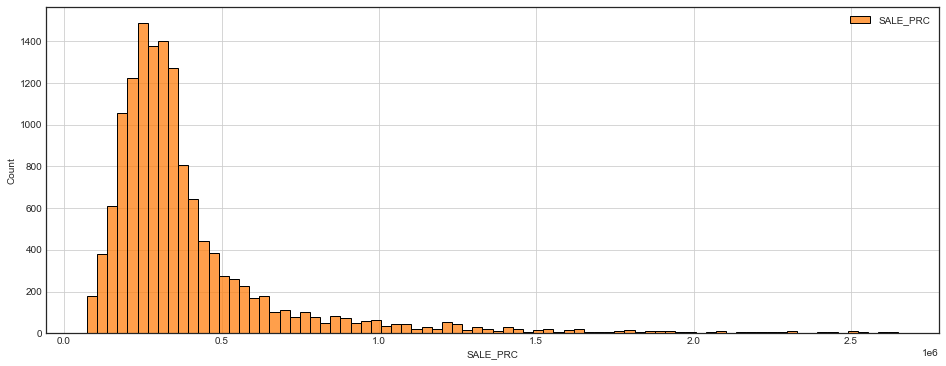

In [111]:
# Understanding the Price Distribution in Miami

fig, ax = plt.subplots(figsize=(16,6)) 
sns.histplot(miami_df['SALE_PRC'], label='SALE_PRC', ax=ax, color='C1',bins=80) 
ax.legend() 
ax.grid()

In [112]:
# Rearranging the distribution values by 'SALE_PRICE' variable

# Target properties worth approximately 1.5 Million Dollars or more.
miami_df[miami_df['SALE_PRC']>1.5*10**6]

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
19,25.895404,-80.154410,622280120740,1870000.0,10875,4552,35124,3253.8,10645.2,0.0,44898.4,38841.8,18007.8,8,0,3,5
25,25.897074,-80.147064,622280210930,1587500.0,12500,4428,41032,4815.7,8226.9,0.0,46198.8,39022.9,20455.9,16,0,6,5
27,25.897585,-80.151392,622280200460,2450000.0,9375,4028,62453,3523.5,9672.6,4.8,45930.7,39415.6,19068.5,2,0,1,5
32,25.898657,-80.149024,622280210370,1550000.0,9375,2358,25757,3974.4,8856.3,0.0,46547.7,39690.8,19835.7,42,0,1,5
36,25.899478,-80.148292,622280210580,1675000.0,13176,4480,31386,4048.2,8595.8,0.0,46908.8,39925.7,20065.3,24,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6754,25.835582,-80.367721,3530170390490,1518200.0,5994,4245,37075,11307.7,57965.6,14465.7,61395.7,47538.4,6248.9,0,0,1,5
6755,25.835584,-80.368820,3530170390560,1757900.0,5100,3803,9480,11485.2,58236.2,14688.3,61741.2,47816.8,5892.0,0,0,12,5
6758,25.835989,-80.369001,3530170390170,1818900.0,5946,4245,36315,11390.2,58375.5,14611.1,61843.4,47953.8,5833.1,0,0,5,5
7284,25.955326,-80.172802,3022050601610,1918000.0,10111,5042,34928,660.5,17671.1,1617.0,61017.1,61017.1,412.5,16,0,7,5


In [113]:
# Filter Properties by 1.5 Million Dollars
miam1= miami_df[['LATITUDE','LONGITUDE',]][miami_df['SALE_PRC']>1.5*10**6]

In [114]:
# Prints results of Property location worth over 1.5 Million Dollars
miam1

,LATITUDE,LONGITUDE
19,25.895404,-80.154410
25,25.897074,-80.147064
27,25.897585,-80.151392
32,25.898657,-80.149024
36,25.899478,-80.148292
...,...,...
6754,25.835582,-80.367721
6755,25.835584,-80.368820
6758,25.835989,-80.369001
7284,25.955326,-80.172802


##### Heatmap Explanation: 

-The heatmap below shows properties located in the area between Biscayne Boulevard and Northeast 135th Street. 

-Properties in this area are valued above $1.5 Million Dollars

-Properties along the coast seem to increase in price due to multiple factors

In [115]:
eq_map = folium.Map(location=[25.899478,-80.148292],zoom_start=15, tiles='Stamen Terrain', attr='<a href=https://www.openstreetmap.org/search?query=25.899478%2C-80.148292#map=4/25.88/-80.11',min_zoom=2.0)
eq_map.add_child(plugins.HeatMap(miam1))

In [116]:
# Rearranging the distribution values by 'SALE_PRICE' variable

# Target properties worth approximately less than 1.5 Million Dollars or more.
miami_df[miami_df['SALE_PRC']>0.3*10**5]

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


In [117]:
# Filter Properties by 1.5 Million Dollars
miam2= miami_df[['LATITUDE','LONGITUDE',]][miami_df['SALE_PRC']>0.3*10**5]

In [118]:
# Prints results of Property location worth over 1.5 Million Dollars
miam2

,LATITUDE,LONGITUDE
0,25.891031,-80.160561
1,25.891324,-80.153968
2,25.891334,-80.153740
3,25.891765,-80.152657
4,25.891825,-80.154639
...,...,...
13927,25.783130,-80.259795
13928,25.783585,-80.260354
13929,25.783793,-80.256126
13930,25.784007,-80.257542


##### Heatmap Explanation: 

-The heatmap below shows properties located inner parts of the City of Miami

-Properties in this area are valued at less than $1 Million Dollars

-The properties Inside heatmap start at approximately $480 Thousand Dollars

In [119]:
eq_map = folium.Map(location=[25.784387,-80.258901],zoom_start=15, tiles='Stamen Terrain', attr='<a href=https://www.openstreetmap.org/search?query=25.784387%09-80.258901#map=17/25.78439/-80.25890',min_zoom=2.0)
eq_map.add_child(plugins.HeatMap(miam2))

#### Sale or Price of Real Estate Property

 - Setting up the SALE_PRC variable to understand Prices in Miami

In [120]:
target=['SALE_PRC']
miami_Y=miami_df['SALE_PRC']
miami_X=miami_df.drop('SALE_PRC',axis=1)

In [121]:
# Setting up 'X' variable

n=len(miami_X)
N=[]
for i in range(n):
    N+=[i]
random.seed(2021)
random.shuffle(N)

In [122]:
# Declaring up traninin and testing variables

trainX=miami_X.loc[N[0:(n//4)*3]]
trainY=miami_Y.loc[N[0:(n//4)*3]]
testX=miami_X.loc[N[(n//4)*3:]]
testY=miami_Y.loc[N[(n//4)*3:]]

In [123]:
# Setting up list of columns 

df_columns = list(miami_X.columns)
print(df_columns)

['LATITUDE', 'LONGITUDE', 'PARCELNO', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age', 'avno60plus', 'month_sold', 'structure_quality']


In [124]:
# Function To create a numeric feature

def create_numeric_feature(input_df):
    use_columns = df_columns 
    return input_df[use_columns].copy()

In [125]:
# Calling context and time libraries for calculations

from contextlib import contextmanager
from time import time

In [126]:
# Declaring a new class Timer

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [127]:
from tqdm import tqdm

def to_feature(input_df):

    processors = [
        create_numeric_feature,
    ]
    
    out_df = pd.DataFrame()
    
    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)
        
    return out_df

In [128]:
# Training and Testing Features

train_feat_df = to_feature(trainX)
test_feat_df = to_feature(testX)

100%|██████████| 1/1 [00:00<00:00, 398.70it/s]


createcreate_numeric_feature  0.002[s]


100%|██████████| 1/1 [00:00<00:00, 503.52it/s]

createcreate_numeric_feature  0.001[s]


#### Setting up the Model 

In [129]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error

def fit_lgbm(X, y, cv, 
             params: dict=None, 
             verbose: int=50):

    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)
        
        with Timer(prefix='fit fold={} '.format(i)):
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)],  
                    early_stopping_rounds=100,
                    verbose=verbose)

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} RMSLE: {mean_squared_error(y_valid, pred_i) ** .5:.4f}')
        print()

    score = mean_squared_error(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))
    return oof_pred, models

In [130]:
params = {
    'objective': 'rmse', 
    'learning_rate': .1,
    'reg_lambda': 1.,
    'reg_alpha': .1,
    'max_depth': 5, 
    'n_estimators': 10000, 
    'colsample_bytree': .5, 
    'min_child_samples': 10,
    'subsample_freq': 3,
    'subsample': .9,
    'importance_type': 'gain', 
    'random_state': 71,
    'num_leaves': 62
}

In [131]:
# Declaring 'y' - variable to store trainY calculations

y = trainY

In [132]:
# Converting into a DataFrame

ydf=pd.DataFrame(y)
ydf.head(10)

,SALE_PRC
113,230000.0
776,125000.0
6953,335000.0
13012,230000.0
633,278000.0
8418,360000.0
10139,225000.0
7335,375000.0
369,150000.0
8614,328000.0


In [133]:
ydf.tail(10)

,SALE_PRC
11406,177500.0
7229,225000.0
6918,542000.0
7357,396000.0
12707,310000.0
4259,690000.0
13289,279900.0
4947,600000.0
1908,460000.0
9969,212000.0


#### Results of Analysis: 

- The Housing market in Florida has exponentially increased in value due to socio-economic and climate related incidents factors. 
- People who are in hte market for new or used properties have to adjust to market prices and high interest rates. 
- Comparing house prices from Miami-City to other parts of Florida is significant. Miami's home market tends to be expensive than other parts of the state because of its proximity to th coast, tourism, high paying jobs in technology and its economic dealings with parts of Central and South America. 